Opening a csv file with japanese sentences, it must compute (as dictionary):
number of sentences, average, max, min, standard dev. sentence length,
unique tokens, kanji ratio

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import csv
import argparse
import re
import spacy 
import ginza
from tqdm import tqdm
from datasets import load_dataset
import matplotlib.pyplot as plt

def count_kanji(string):
    kanji_pattern = re.compile(r'[\u4e00-\u9faf]+')  # This regex pattern matches Kanji characters
    kanji_matches = kanji_pattern.findall(string)
    return len("".join(kanji_matches))

def compute_kanji_ratio(string):
    total_characters = len(string)
    kanji_count = count_kanji(string)
    kanji_ratio = (kanji_count / total_characters)
    return kanji_ratio

def analyze_sentences(series, corpus_name='corpus name', out_file='analysis.csv', tokenizer=None):
    sentences = series.tolist()

    if isinstance(sentences[0], str):
        sentences = [tokenizer(sentence) for sentence in sentences]

    

    # Tokenize sentences and calculate lengths
    sentence_lengths = [len(sentence) for sentence in sentences]
    num_sentences = len(sentences)
    avg_length = np.mean(sentence_lengths)
    max_length = np.max(sentence_lengths)
    min_length = np.min(sentence_lengths)
    std_dev_length = np.std(sentence_lengths)

    # Count unique tokens (characters)
    try:
        unique_tokens = set(''.join([sentence.text for sentence in sentences]))
        # compute kanji ratio info
        kanji_ratios = [compute_kanji_ratio(sentence.text) for sentence in sentences]
    except:
        sentences_text = ["".join([token for token in sentence]) for sentence in sentences]
        #print(sentences_text[:2])
        unique_tokens = set(''.join([sentence for sentence in sentences_text]))
        kanji_ratios = [compute_kanji_ratio(sentence) for sentence in sentences_text]

    num_unique_tokens = len(unique_tokens)

    kanji_ratio_avg = np.mean(kanji_ratios)
    kanji_ratio_sd = np.std(kanji_ratios)

    # Prepare the results dictionary
    stats = {
        "corpus_name": corpus_name,
        "number_of_sentences": num_sentences,
        "average_sentence_length": avg_length,
        "max_sentence_length": max_length,
        "min_sentence_length": min_length,
        "std_dev_sentence_length": std_dev_length,
        "number_of_unique_tokens": num_unique_tokens,
        "kanji_ratio_avg": kanji_ratio_avg,
        "kanji_ratio_sd": kanji_ratio_sd
    }

    # Write to a CSV file in append mode
    with open(out_file, 'a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=stats.keys())
        if file.tell() == 0:  # If file is empty, write header
            writer.writeheader()
        writer.writerow(stats)

    return stats

c:\Users\Enri\miniconda3\envs\nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nlp = spacy.load('ja_ginza_electra')
tokenizer = nlp.tokenizer

In [9]:
 # Read sentences from the input CSV file
# Assuming the sentences are in a column named 'sentences'
# input_csv = './wikipedia/wikipedia.txt'
# output_csv = './analysis.csv'

# if 'wikipedia' in input_csv.split(sep='/')[-1]:
#     # use read line by line
#     rows = []
#     with open(input_csv) as input_file:
#         for line in input_file:
#             line = line.strip()
#             if line:
#                 rows.append(line)
#     df = pd.DataFrame(rows, columns=['sentence'])
# else: 
#     df = pd.read_csv(input_csv, usecols=['sentence'])

# series = df['sentence']

In [4]:
# non_strings = series.apply(lambda x: not isinstance(x, str))

# # non_strings will be a Boolean Series with True where elements are not strings
# print(non_strings.value_counts())
# print(series[non_strings])
# cleaned_series = series[~non_strings].reset_index(drop=True)
# cleaned_series.to_csv('./wikipedia/wikipedia_clean.csv', header=False, index=False)

In [3]:
import matplotlib.pyplot as plt

def plot_length_distribution(sentence_lengths, name=None):
    """Plots a bin histogram with the counts"""
    # Calculate the lengths of the sentences
    #sentence_lengths = data.str.len()

    # Define custom bins for sentence lengths
    bins = np.arange(0, max(sentence_lengths)+3, 1)  # Adjust the bin width as needed
    #bins = np.arange(1000, max(sentence_lengths) + 10, 10)  # Adjust the bin width as needed
    
    # Create a histogram with custom bins
    plt.hist(sentence_lengths, bins=bins, color='lightblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Sentence length')
    plt.ylabel('Counts')
    
    plt.xticks(np.arange(0,max(sentence_lengths)+5,10))
    if name:
        plt.title(f'{name} sentence length distribution')
    plt.grid(False)
    plt.show()

    return None

In [9]:
# Analyze sentences
# stats = analyze_sentences(series, corpus_name=input_csv, out_file=output_csv)

# print(stats)

{'corpus_name': './wikipedia/wikipedia.txt', 'number_of_sentences': 13277275, 'average_sentence_length': 47.129364948756425, 'max_sentence_length': 111, 'min_sentence_length': 5, 'std_dev_sentence_length': 20.796523941523144, 'number_of_unique_tokens': 13481}


In [10]:
# def main(args=None):
#     # Set up argument parser
#     parser = argparse.ArgumentParser(description='Analyze sentences from a CSV file.')
#     parser.add_argument('input_csv', type=str, help='Path to the input CSV file containing sentences.')
#     parser.add_argument('output_csv', type=str, help='Path to the output CSV file to save results.')

#     # Parse arguments
#     args = parser.parse_args()

#     # Read sentences from the input CSV file
#     # Assuming the sentences are in a column named 'sentences'
#     df = pd.read_csv(args.input_csv, index_col=0)
#     series = df['sentence']  # Replace 'sentences' with the actual column name

#     # Analyze sentences
#     stats = analyze_sentences(series, corpus_name=args.input_csv, out_file=args.output_csv)
#     print(stats)


# if __name__ == '__main__':
#     main(args=['ciao','ciao'])

In [4]:
# analyze the big corpus together and by source

# Read sentences from the input CSV file
# Assuming the sentences are in a column named 'sentences'
input_csv = '/data/enrico_benedetti/nihongoexample/data/corpus_all/jp_sentences/corpus_level.csv'
df = pd.read_csv(input_csv)
df['source'] = np.nan

FileNotFoundError: [Errno 2] No such file or directory: '/data/enrico_benedetti/nihongoexample/data/corpus_all/jp_sentences/corpus_level.csv'

In [5]:
# recover the sources
sources_csv = './corpus_all/jp_sentences/sources.csv'
df_sources = pd.read_csv(sources_csv, index_col=0)
for index, data in df_sources.iterrows():
    df['source'].loc[index] = data['source']
df['source'].fillna(method='ffill', inplace=True)
df['source'].value_counts()
# test of recovering it works
first_unique_index = df[df['source'].duplicated() == False].index
assert(all(first_unique_index == df_sources.index))

FileNotFoundError: [Errno 2] No such file or directory: './corpus_all/jp_sentences/sources.csv'

In [6]:
# divide by source
sources = df_sources['source'].values
sources

array(['jpwac', 'tatoeba', 'wikipedia'], dtype=object)

In [7]:
value_counts = df['source'].value_counts()

# Calculate proportions
proportions = value_counts / len(df)
print(proportions)
print(proportions.to_latex())

source
wikipedia    0.968631
tatoeba      0.019346
jpwac        0.012023
Name: count, dtype: float64
\begin{tabular}{lr}
\toprule
 & count \\
source &  \\
\midrule
wikipedia & 0.968631 \\
tatoeba & 0.019346 \\
jpwac & 0.012023 \\
\bottomrule
\end{tabular}



In [10]:
# tokenize everything (takes 2h) weird that tokenizing with sudachipy batched takes half an hour only
#tokenized_series = df['sentence'].apply(lambda s: tokenizer(s))
#df['tokenized'] = tokenized_series
#tokenized_series.to_csv('tokenized_precomputed.csv', index=False)

In [7]:
from datasets import load_dataset
from ast import literal_eval

In [40]:
# skip tokenizing and just load the other dataset
df_tokenized = load_dataset('bennexx/jp_sentences', "tokenized_data")
df_tokenized = df_tokenized['train'].to_pandas()
df_tokenized['sentence_tokenized'] = df_tokenized['sentence_tokenized'].apply(literal_eval)

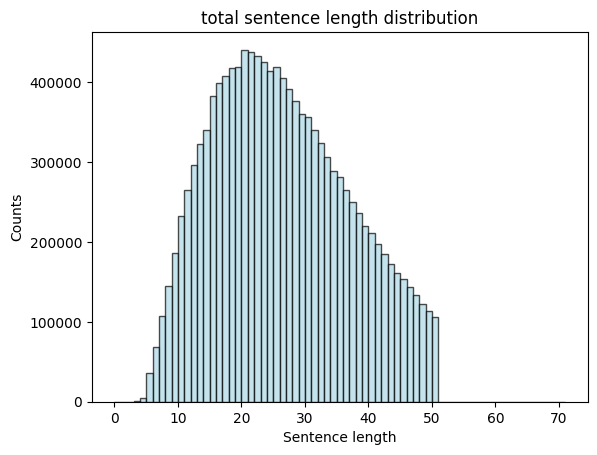

In [50]:
# analyze everything # need to fix the tokenizing... depends on spacy
analyze_sentences(df_tokenized['sentence_tokenized'], corpus_name='total', out_file='./analysis_all.csv')
plot_length_distribution([len(s) for s in df_tokenized['sentence_tokenized']], name='total')

  0%|          | 0/3 [00:00<?, ?it/s]

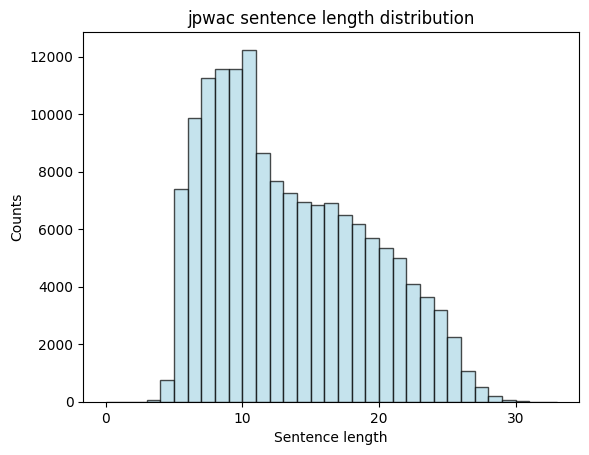

 33%|███▎      | 1/3 [00:03<00:07,  3.95s/it]

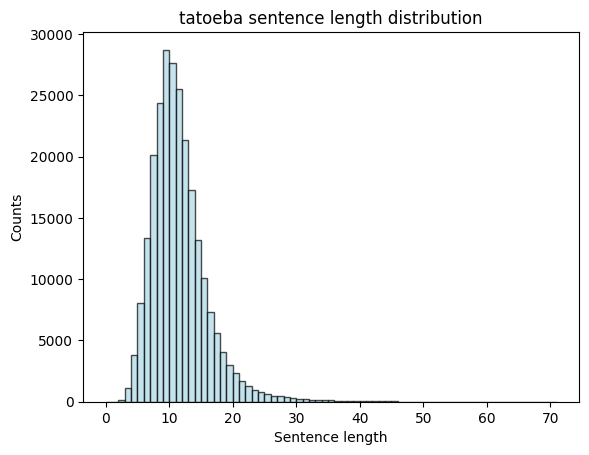

 67%|██████▋   | 2/3 [00:09<00:05,  5.12s/it]

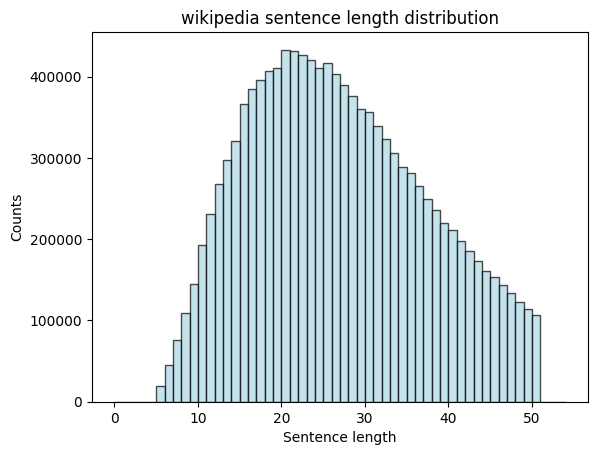

100%|██████████| 3/3 [08:53<00:00, 177.93s/it]


In [55]:
for source in tqdm(sources):
    df_sub = df[df.source == source]
    #tokenized_series = df_sub['sentence'].apply(lambda s: tokenizer(s))
    analyze_sentences(df_sub['tokenized'], corpus_name=source, out_file='./analysis_all.csv')
    plot_length_distribution([len(s) for s in df_sub['tokenized']], name=source)

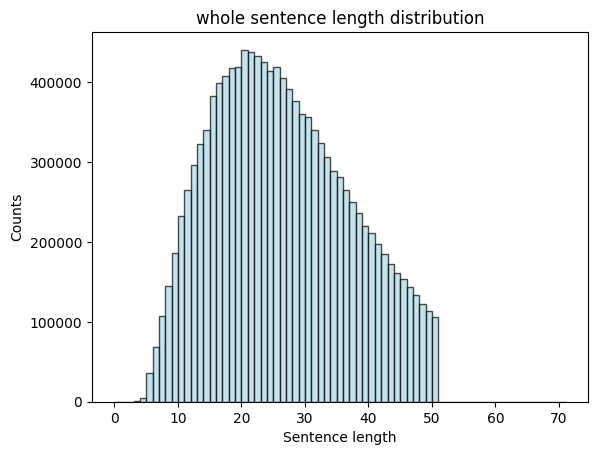

In [56]:
# all together
#analyze_sentences(df['tokenized'], corpus_name='all', out_file='./analysis_all.csv')
plot_length_distribution([len(s) for s in df['tokenized']], name='whole')

In [2]:
# read file and latex it
analysis = pd.read_csv('analysis_all.csv')

In [3]:
proportions = proportions.rename_axis(['corpus_name'])

NameError: name 'proportions' is not defined

In [4]:
column_rename = {
    'corpus_name': 'Corpus',
    'number_of_sentences': 'n of sentences',
    'average_sentence_length': 'Sent length (avg.)',
    'max_sentence_length': 'Sent length (max)',
    'min_sentence_length': 'Sent length (min)',
    'std_dev_sentence_length': 'Sent length (std)',
    'number_of_unique_tokens': 'n of unique tokens',
    'count': '$\%$'
}

In [63]:
analysis = analysis.merge(proportions, on='corpus_name', how='outer')


In [64]:
analysis = analysis.rename(columns=column_rename)

In [65]:
analysis.columns.values[:4].tolist()

['Corpus', 'n of sentences', 'Sent length (avg.)', 'Sent length (max)']

In [66]:
latex_table = analysis.to_latex(index=False, float_format="%2.2f")

print(latex_table)

\begin{tabular}{lrrrrrrrrrr}
\toprule
Corpus & n of sentences & Sent length (avg.) & Sent length (max) & Sent length (min) & Sent length (std) & n of unique tokens & kanji_ratio_avg & kanji_ratio_sd & count_x & count_y \\
\midrule
jpwac & 152751 & 13.01 & 31 & 2 & 5.69 & 3301 & 0.27 & 0.14 & 0.01 & 0.01 \\
tatoeba & 245793 & 11.07 & 69 & 2 & 4.59 & 3406 & 0.27 & 0.13 & 0.02 & 0.02 \\
wikipedia & 12306416 & 26.39 & 52 & 4 & 10.60 & 12121 & 0.37 & 0.13 & 0.97 & 0.97 \\
total & 12704960 & 25.93 & 69 & 2 & 10.78 & 12189 & 0.36 & 0.13 & NaN & NaN \\
\bottomrule
\end{tabular}



In [8]:
## analyzing the levels

# we start with a normal value counts and a tortagrafico (?) or just a table is ok?
colors = ['#FFC0CB', '#AEC6CF', '#98FB98', '#B19CD9', '#FFD700']

level
N1    0.047705
N2    0.456599
N3    0.480991
N4    0.011621
N5    0.003085
Name: proportion, dtype: float64

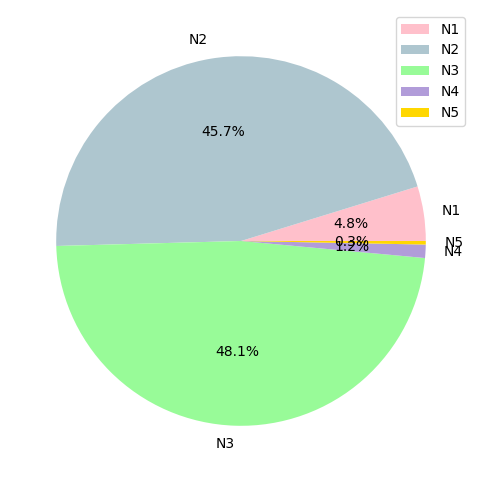

In [9]:
level_data = df.value_counts(subset='level', normalize=True, sort=False)
display(level_data)
pie_chart = level_data.plot(kind='pie', ylabel='', figsize=(6,6), startangle=0, legend=True, autopct='%1.1f%%', colors=colors)
plt.savefig("level_pie_chart.svg", format="svg")

level
N1    0.054631
N2    0.274198
N3    0.452377
N4    0.163514
N5    0.055280
Name: proportion, dtype: float64


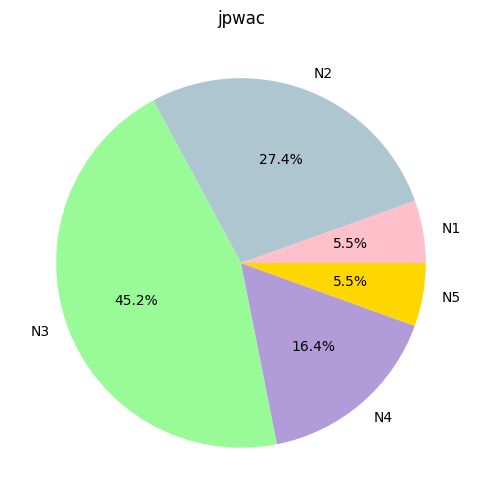

level
N1    0.031445
N2    0.145346
N3    0.446367
N4    0.260060
N5    0.116781
Name: proportion, dtype: float64


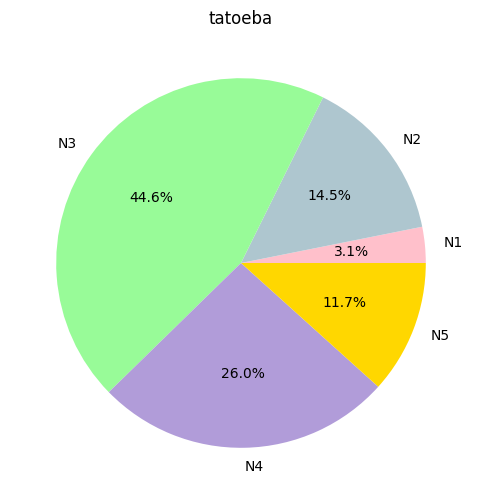

level
N1    0.047943
N2    0.465080
N3    0.482038
N4    0.004773
N5    0.000166
Name: proportion, dtype: float64


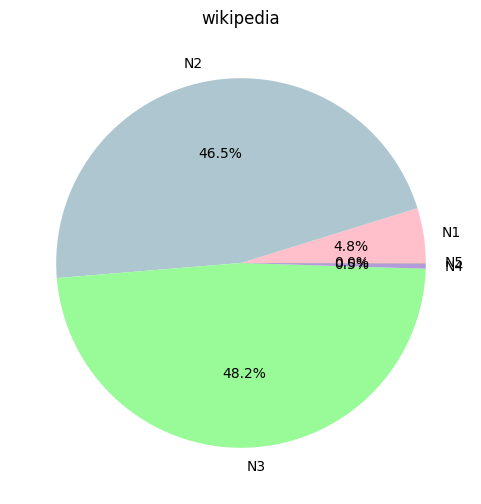

In [10]:
for source in sources:
    source_data = df[df['source'] == source].sort_values(by='level')
    level_counts = source_data['level'].value_counts(normalize=True, sort=False)
    print(level_counts)
    
    level_counts.plot(kind='pie', ylabel='', title=f"{source}", figsize=(6,6), startangle=0, autopct='%1.1f%%', colors=colors)
    plt.savefig(f"{source}_level_pie_chart.svg", format="svg")
    plt.show()

In [7]:
corpus = load_dataset("bennexx/jp_sentences")

Generating train split: 12704960 examples [00:27, 459346.14 examples/s]


In [8]:
df = corpus['train'].to_pandas()

In [16]:
kanji_ratios = [compute_kanji_ratio(sentence) for sentence in df['sentence'].iloc[152751:398544]]

In [17]:
np.mean(kanji_ratios)

0.26748979155128655

In [50]:
corpus

DatasetDict({
    train: Dataset({
        features: ['sentence', 'level'],
        num_rows: 12704960
    })
})

In [51]:
## see if lenght is correlated with the label

display(df.groupby(by='level').apply(lambda x: x['sentence'].str.len().mean()).reset_index(name="avg length"))

,level,avg length
0,N1,50.106013
1,N2,48.556593
2,N3,39.521562
3,N4,18.679915
4,N5,12.836740
